## Overview

As the next step of our analysis, we will be attempting to predict the `smipppy`, (Predicted Probability of Severe Mental Illness in the Past Year) using the NSDUH data. Our goal is to use data on cannabis use to predict the probability of severe mental illness. 

In order to do this prediction task, we will use decision tree. First, we will use a simple decision tree as a baseline model for comparison. Next, we will use stochastic gradient boosting to improve the performance of our model. Finally, we will use a random forest model to see if we can improve our model further.

## Methods

Before we begin the implementation of our models, we will give a brief technical overview of the methods we will be using.

### Decision Tree

A decision tree is a simple method for both classification and regression. Decision trees are non-parametric models that are very easy to implement, understand, and visualize. Decision tress are often chosen for their high interpretability, since they are easy to understand and provide transparency into how the model makes predictions. 

Decision trees work by developing a sequential set of rules that are used to predict the target variable. For a numeric feature, a decision tree starts by looking at all the data and finding the optimal feature and split point to minimize the sum of squared errors. This means the data will be split into observations where the given feature value is less than the split point and observations where the given feature value is more than the split point. For a categorical feature, the decision tree will split the data into observations based on the categories of the feature, again using the sum of squared errors to find a split point. This process is repeated recursively, continually subdividing the nodes, until a stopping point is reached. When the stopping point is met, each leaf node will represent a numeric value derived as the average of the target variable for all the observations in that leaf node.

When implementing a decision tree, there are a few hyperparameters that can be tuned for better performance. The maximum depth of the tree can be tuned to find the optimal number of splits. The minimum number of samples required to split an internal node can also be tuned, preventing the tree from splitting nodes with too few observations. The metric used to measure the quality of a split can also be tuned, but we will use the default metric which is the sum of squared errors.

While fitting a single decision tree to the data is easy, fast, and highly interpretable, it has significant drawbacks. Decision trees are prone to overfitting, especially without tuning the hyperparameters or pruning. Decision trees are also unstable, meaning that small changes in the data can lead to large changes how the model is built and makes predictions. Decision trees also make highly local predictions since they work much like a large piecewise function, meaning they cannot extrapolate well to new data.

### Random Forest

Random forest is an ensemble method that combines multiple decision trees into one model that performs better than an individual tree. Random forests are effective at combatting the weaknesses of single decision trees. They tend to have better performance and are less prone to overfitting. They are also more stable because predictions come from an ensemble of trees rather than one single tree.

Random forest work by first creating a data set sample from the original data set, with replacement. This new bootstrapped data set is the same size as the initial data set. Next, a decision tree is fit to the bootstrapped data set. However, at each node, a random subset of features is selected. Then, the tree is built in te same way as the normal decision tree, finding an optimal split point and minimizing the sum of squared errors. This process is repeated for many trees, each turning out different due to the bootstrapping and random feature selection. Finally, the predictions from each tree are averaged to get the final prediction, creating an ensemble learner.

When implementing a random forest, there are hyperparameters that can be tuned to improve performance. The number of predictors chosen at each split can be tuned. Typically, the best number is the square root of the total number of predictors. The same hyperparameters as the decision tree can also be tuned, such as the maximum depth of the tree and the minimum number of samples required to split an internal node.

## Data

Once again, we will be use the NSDUH data set from SAMSHA to employ substance usage data to predict mental health outcomes. Our target variable will be `smipppy`, which is the predicted probability of severe mental illness in the past year. Our predictor variables will be variables relating to cannabis usage.

In [119]:
import pandas as pd
import numpy as np

nsduh = pd.read_csv('../../../data/clean_data/nsduh_2021.csv')
nsduh = nsduh[['mjage', 'mjmfu', 'mjyrtot', 'mrbstway', 'mrdaypyr', 'mrdaypwk', 'MR30EST', 'smipppy']]

In [120]:
# Replace all values equal to 999 with NaN
nsduh = nsduh.replace(9991, -1)
nsduh = nsduh.replace(991, -1)
nsduh = nsduh.replace(91, -1)
nsduh = nsduh.replace(9993, -2)
nsduh = nsduh.replace(993, -2)
nsduh = nsduh.replace(93, -2)
nsduh = nsduh.replace(9994, np.nan)
nsduh = nsduh.replace(994, np.nan)
nsduh = nsduh.replace(94, np.nan)
nsduh = nsduh.replace(9997, np.nan)
nsduh = nsduh.replace(997, np.nan)
nsduh = nsduh.replace(97, np.nan)
nsduh = nsduh.replace(9998, np.nan)
nsduh = nsduh.replace(998, np.nan)
nsduh = nsduh.replace(98, np.nan)
nsduh = nsduh.replace(9999, np.nan)
nsduh = nsduh.replace(999, np.nan)
nsduh = nsduh.replace(99, np.nan)
nsduh = nsduh.replace(9981, -1)
nsduh = nsduh.replace(981, -1)
nsduh = nsduh.replace(81, -1)
nsduh = nsduh.replace(9983, -2)
nsduh = nsduh.replace(983, -2)
nsduh = nsduh.replace(83, -2)
nsduh = nsduh.replace(9985, np.nan)
nsduh = nsduh.replace(985, np.nan)
nsduh = nsduh.replace(85, np.nan)
nsduh = nsduh.replace(9989, np.nan)
nsduh = nsduh.replace(989, np.nan)
nsduh = nsduh.replace(89, np.nan)
nsduh = nsduh.replace('9991', -1)
nsduh = nsduh.replace('991', -1)
nsduh = nsduh.replace('91', -1)
nsduh = nsduh.replace('9993', -2)
nsduh = nsduh.replace('993', -2)
nsduh = nsduh.replace('93', -2)
nsduh = nsduh.replace('9994', np.nan)
nsduh = nsduh.replace('994', np.nan)
nsduh = nsduh.replace('94', np.nan)
nsduh = nsduh.replace('9997', np.nan)
nsduh = nsduh.replace('997', np.nan)
nsduh = nsduh.replace('97', np.nan)
nsduh = nsduh.replace('9998', np.nan)
nsduh = nsduh.replace('998', np.nan)
nsduh = nsduh.replace('98', np.nan)
nsduh = nsduh.replace('9999', np.nan)
nsduh = nsduh.replace('999', np.nan)
nsduh = nsduh.replace('99', np.nan)
nsduh = nsduh.replace('9981', -1)
nsduh = nsduh.replace('981', -1)
nsduh = nsduh.replace('81', -1)
nsduh = nsduh.replace('9983', -2)
nsduh = nsduh.replace('983', -2)
nsduh = nsduh.replace('83', -2)
nsduh = nsduh.replace('9985', np.nan)
nsduh = nsduh.replace('985', np.nan)
nsduh = nsduh.replace('85', np.nan)
nsduh = nsduh.replace('9989', np.nan)
nsduh = nsduh.replace('989', np.nan)
nsduh = nsduh.replace('89', np.nan)
nsduh = nsduh.replace('Never Used', -1)

In [122]:
# combine mrdaypyr and mrdaypwk into one column
nsduh['mrdaypyr'] = nsduh['mrdaypyr'].fillna(0)
nsduh['mrdaypwk'] = nsduh['mrdaypwk'].fillna(0)

# if value is positive, multiply by 52 to get yearly value
nsduh['days_per_year'] = nsduh['mrdaypwk'].apply(lambda x: int(x) * 52 if int(x) > 0 else x)

# mutate mrdaypyr and mrdaypwk to be numeric
nsduh['mrdaypyr'] = pd.to_numeric(nsduh['mrdaypyr'], errors='coerce')
nsduh['mrdaypwk'] = pd.to_numeric(nsduh['mrdaypwk'], errors='coerce')
nsduh['MR30EST'] = pd.to_numeric(nsduh['MR30EST'], errors='coerce')

# if mrdaypyr is positive, add to days_per_year
nsduh['days_per_year'] = np.where(nsduh['mrdaypyr'] > 0, nsduh['days_per_year'] + nsduh['mrdaypyr'], nsduh['days_per_year'])
nsduh['days_per_year'] = np.where(nsduh['MR30EST'] > 0, nsduh['MR30EST'] * 12, nsduh['days_per_year'])

nsduh = nsduh.drop(['mrdaypyr', 'mrdaypwk', 'MR30EST'], axis=1)
nsduh

,mjage,mjmfu,mjyrtot,mrbstway,smipppy,days_per_year
0,19,NaN,52,1,0.008998,52.0
1,-1,-1,-1,-1,0.008998,-1.0
2,-1,-1,-1,-1,0.028021,-1.0
3,13,NaN,364,1,0.071654,364.0
4,-1,-1,-1,-1,0.004786,-1.0
...,...,...,...,...,...,...
58029,21,NaN,-2,-2,0.008998,-2.0
58030,25,NaN,-2,-2,0.040617,-2.0
58031,18,NaN,48,2,0.003488,0.0
58032,19,NaN,3,3,0.008998,3.0


In [123]:
# print type of each column
print(nsduh.dtypes)
# convert all columns to numeric
nsduh = nsduh.apply(pd.to_numeric)

mjage             object
mjmfu             object
mjyrtot           object
mrbstway          object
smipppy          float64
days_per_year    float64
dtype: object


In [124]:
nsduh = nsduh.dropna()

In [149]:
nsduh.shape

(23969, 6)

## Implementation

Now that we have given a brief overview of the methods we will be using and loaded in our data, we can begin implementing our models.

We'll start by splitting our into training and testing sets. We will use 80% of the data for training and 20% for testing. We will also set a random seed so that our results are reproducible.

In [150]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(nsduh.drop(['smipppy'], axis=1), nsduh['smipppy'], test_size=0.20, random_state=371)

### Baseline Model

Our baseline model will be entirely random numeric predictions. We will use the root mean squared error to evaluate the performance of our baseline model.

In [151]:
# create random predictor which gives any value between 0 and 1
import random
random.seed(371)
rand_pred = [random.uniform(0, 1) for _ in range(len(test_labels))]

In [152]:
# Evaluate the random model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

rand_mse = mean_squared_error(test_labels, rand_pred)
rand_rmse = np.sqrt(rand_mse)
print('Random RMSE: ', rand_rmse)
rand_mae = mean_absolute_error(test_labels, rand_pred)
print('Random MAE: ', rand_mae)
rand_r2 = r2_score(test_labels, rand_pred)
print('Random R2: ', rand_r2)

Random RMSE:  0.5527905917092234
Random MAE:  0.47304614099131814
Random R2:  -19.30031772945689


### Decision Tree

Next, we will use a normal decision tree. We expect this model to perform only moderately well, but it will give us a reference to compare our more advanced models to. We will tune for the maximum depth of the tree and the minimum number of samples required to split an internal node.

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Tune hyperparameters
results = {}
for max_depth in range(5, 15):
    for min_samples_split in range(2, 10):
        decision_tree = DecisionTreeRegressor(random_state=371, max_depth=max_depth, min_samples_split=min_samples_split)
        decision_tree.fit(train_features, train_labels)
        decision_tree_pred = decision_tree.predict(test_features)
        decision_tree_mse = mean_squared_error(test_labels, decision_tree_pred)
        decision_tree_rmse = np.sqrt(decision_tree_mse)
        decision_tree_mae = mean_absolute_error(test_labels, decision_tree_pred)
        decision_tree_r2 = r2_score(test_labels, decision_tree_pred)
        results[(max_depth, min_samples_split)] = decision_tree_rmse, decision_tree_mae, decision_tree_r2, decision_tree, decision_tree_pred

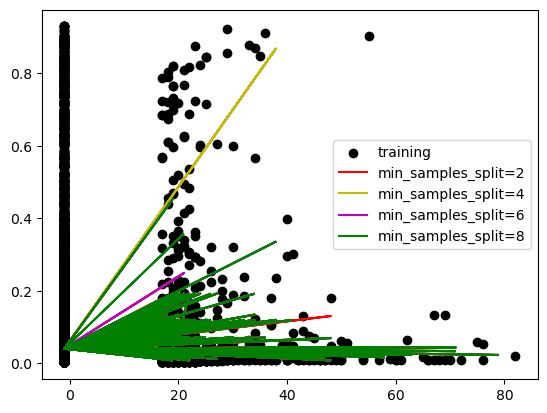

In [157]:
from matplotlib import pyplot as plt

plt.figure()
plt.scatter(train_features['mjage'], train_labels, c='k', label='training')
plt.plot(test_features['mjage'], results[(5, 2)][4], c='r', label='min_samples_split=2')
plt.plot(test_features['mjage'], results[(5, 4)][4], c='y', label='min_samples_split=4')
plt.plot(test_features['mjage'], results[(5, 6)][4], c='m', label='min_samples_split=6')
plt.plot(test_features['mjage'], results[(5, 8)][4], c='g', label='min_samples_split=8')
plt.legend()
plt.show()

In [158]:
results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ['max_depth', 'min_samples_split', 'rmse', 'mae', 'r2', 'model', 'pred']
results_df.sort_values('rmse', ascending=True)

best_max_depth = results_df.sort_values('rmse', ascending=True).iloc[0]['max_depth']
best_max_depth = int(best_max_depth)
best_min_samples_split = results_df.sort_values('rmse', ascending=True).iloc[0]['min_samples_split']
best_min_samples_split = int(best_min_samples_split)

Decision Tree RMSE:  0.12205319291140562
Decision Tree MAE:  0.05658890114799911
Decision Tree R2:  0.01035407758738438


[Text(0.46209016393442626, 0.9285714285714286, 'x[1] <= 2.5\nsquared_error = 0.015\nsamples = 19175\nvalue = 0.043'),
 Text(0.20491803278688525, 0.7857142857142857, 'x[2] <= 234.0\nsquared_error = 0.014\nsamples = 18610\nvalue = 0.041'),
 Text(0.1885245901639344, 0.6428571428571429, 'x[2] <= 2.5\nsquared_error = 0.014\nsamples = 18605\nvalue = 0.041'),
 Text(0.09016393442622951, 0.5, 'x[2] <= -1.5\nsquared_error = 0.014\nsamples = 18555\nvalue = 0.041'),
 Text(0.03278688524590164, 0.35714285714285715, 'x[0] <= 18.5\nsquared_error = 0.0\nsamples = 16\nvalue = 0.012'),
 Text(0.01639344262295082, 0.21428571428571427, 'squared_error = 0.0\nsamples = 4\nvalue = 0.022'),
 Text(0.04918032786885246, 0.21428571428571427, 'x[1] <= 1.5\nsquared_error = 0.0\nsamples = 12\nvalue = 0.009'),
 Text(0.03278688524590164, 0.07142857142857142, 'squared_error = 0.0\nsamples = 4\nvalue = 0.006'),
 Text(0.06557377049180328, 0.07142857142857142, 'squared_error = 0.0\nsamples = 8\nvalue = 0.01'),
 Text(0.14754

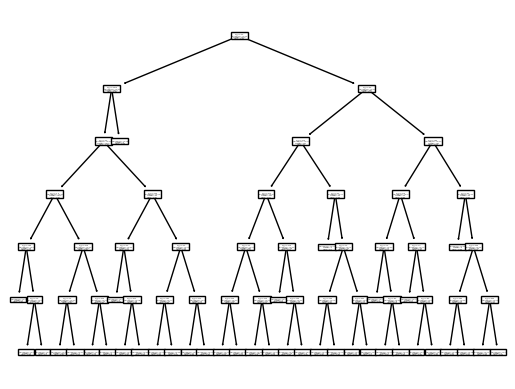

In [159]:
decision_tree = DecisionTreeRegressor(random_state=371, max_depth=best_max_depth, min_samples_split=best_min_samples_split)
decision_tree.fit(train_features, train_labels)

decision_tree_pred = decision_tree.predict(test_features)

decision_tree_mse = mean_squared_error(test_labels, decision_tree_pred)
decision_tree_rmse = np.sqrt(decision_tree_mse)
print('Decision Tree RMSE: ', decision_tree_rmse)
decision_tree_mae = mean_absolute_error(test_labels, decision_tree_pred)
print('Decision Tree MAE: ', decision_tree_mae)
decision_tree_r2 = r2_score(test_labels, decision_tree_pred)
print('Decision Tree R2: ', decision_tree_r2)

plot_tree(decision_tree)

In [162]:
plt.figure()
plt.plot(sorted(train_features['mjage']), decision_tree.predict(sorted(train_features)), color="b", label="max_depth=2", linewidth=2)
plt.scatter(train_features['mjage'], train_labels, c='k', label='training')
plt.scatter(test_features['mjage'], test_labels, c='g', label='testing')
plt.plot(test_features['mjage'], decision_tree_pred, c='r', label='decision tree')
plt.legend()
plt.show()

ValueError: could not convert string to float: 'days_per_year'

<Figure size 640x480 with 0 Axes>

### Random Forest

Finally, we will use a random forest model. We expect this model to perform better than our decision tree model.

In [138]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

# Tune hyperparameters
results_rf = {}
for n_estimators in tqdm(range(100, 1000, 100)):
    for max_depth in tqdm(range(1, 15)):
        random_forest = RandomForestRegressor(random_state=371, n_estimators=n_estimators, max_depth=max_depth)
        random_forest.fit(train_features, train_labels)
        random_forest_pred = random_forest.predict(test_features)
        random_forest_mse = mean_squared_error(test_labels, random_forest_pred)
        random_forest_rmse = np.sqrt(random_forest_mse)
        random_forest_mae = mean_absolute_error(test_labels, random_forest_pred)
        random_forest_r2 = r2_score(test_labels, random_forest_pred)
        results_rf[(n_estimators, max_depth, min_samples_split)] = random_forest_rmse, random_forest_mae, random_forest_r2, random_forest, random_forest_pred

  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 9/9 [04:01<00:00, 26.81s/it]


In [140]:
results_rf_df = pd.DataFrame(results_rf).T.reset_index()
results_rf_df.columns = ['n_estimators', 'max_depth', 'min_samples_split', 'rmse', 'mae', 'r2', 'model', 'pred']
results_rf_df.sort_values('rmse', ascending=True)

best_n_estimators = results_rf_df.sort_values('rmse', ascending=True).iloc[0]['n_estimators']
best_n_estimators = int(best_n_estimators)
best_max_depth = results_rf_df.sort_values('rmse', ascending=True).iloc[0]['max_depth']
best_max_depth = int(best_max_depth)
best_min_samples_split = results_rf_df.sort_values('rmse', ascending=True).iloc[0]['min_samples_split']
best_min_samples_split = int(best_min_samples_split)

In [141]:
random_forest = RandomForestRegressor(random_state=371, n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split)
random_forest.fit(train_features, train_labels)

random_forest_pred = random_forest.predict(test_features)

random_forest_mse = mean_squared_error(test_labels, random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
print('Random Forest RMSE: ', random_forest_rmse)
random_forest_mae = mean_absolute_error(test_labels, random_forest_pred)
print('Random Forest MAE: ', random_forest_mae)
random_forest_r2 = r2_score(test_labels, random_forest_pred)
print('Random Forest R2: ', random_forest_r2)

Random Forest RMSE:  0.12212762596350211
Random Forest MAE:  0.05689213032860902
Random Forest R2:  0.009146656037627543


ValueError: could not convert string to float: 'days_per_year'

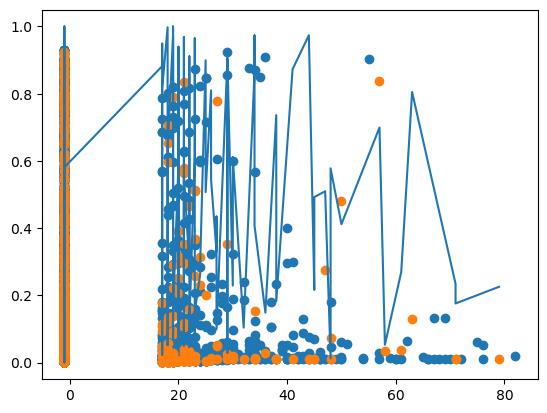

In [161]:
from matplotlib import pyplot as plt

plt.figure()
plt.scatter(train_features['mjage'], train_labels, label='Training Data')
plt.scatter(test_features['mjage'], test_labels, label='Testing Data')
plt.plot(sorted(test_features['mjage']), rand_pred, label='Random Model')
plt.plot(sorted(test_features['mjage']), decision_tree.predict(sorted(test_features)), label='Decision Tree')
plt.plot(sorted(test_features['mjage']), random_forest.predict(sorted(test_features)), label='Random Forest')

plt.xlabel('Age of First Marijuana Use')
plt.ylabel('Probability of Severe Mental Illness')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()